In [2]:
import numpy as np
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier
import numpy.random as rnd
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
data_set=pd.read_csv("Mmr_monitor.csv")
print("length of dataset:",len(data_set))
print("size of dataset:",data_set.shape)
data_set.head()
cols = data_set.columns.tolist()
cols.insert(3, cols.pop(1))
data_set = data_set[cols]

length of dataset: 998
size of dataset: (998, 19)


In [2]:
 data_set

Patient_id  Mobileof    MobileNo  age  is_anc1_taken  is_anc2_taken  \
0    118004098640    Others  9613579354   19              1              1   
1    118004098641      Wife  9401883549   32              1              1   
2    118004098642    Others  9854438892   27              1              1   
3    118004098643    Others  9854438892   28              1              1   
4    118004098644    Others  9854438892   25              1              1   
5    118004098645    Others  9854438892   34              1              1   
6    118004098646      Wife  9854642592   25              1              0   
7    118004098647      Wife  9613857779   25              1              0   
8    118004098648    Others  9854438892   31              1              1   
9    118004098649      Wife  7636077760   30              1              1   
10   118004098650    Others  7399135954   35              1              1   
11   118004098651    Others  7399135954   21              1              1   
12   118004098652    Others  7399135954   21              1              1   
13   118004098653    Others  9859106288   35              1              1   
14   118004098654    Others  9859106288   22              1              0   
15   118004098655      Wife  9365887850   26              1              0   
16   118004098656    Others  9859106288   29              1              1   
17   118004098657    Others  9401040086   23              1              1   
18   118004098658    Others  9401040086   23              1              1   
19   118004098659    Others  9401040086   25              1              1   
20   118004098660    Others  9401040086   28              1              1   
21   118004098661      Wife  9365719382   27              1              1   
22   118004098662      Wife  8399872838   19              1              1   
23   118004098663    Others  8011288702   18              1              1   
24   118004098664    Others  8011288702   24              1              1   
25   118004098665    Others  8011288702   35              1              1   
26   118004098666      Wife  8317375391   20              1              1   
27   118004098667      Wife  9435881526   31              1              0   
28   118004098668      Wife  7636813058   21              1              1   
29   118004098669    Others  7399135954   38              1              1   
..            ...       ...         ...  ...            ...            ...   
968  118004110058      Wife  9435825099   25              1              1   
969  118004110059      Wife  9435922422   27              1              0   
970  118004110060      Wife  9401044595   25              1              0   
971  118004110062      Wife  9401438459   30              1              1   
972  118004110063      Wife  9531330887   28              1              1   
973  118004110064  Relative  9401640390   30              1              1   
974  118004111009      Wife  9435415594   32              1              1   
975  118004111010      Wife  9401345163   25              1              1   
976  118004111011      Wife  9401073785   24              1              1   
977  118004111012      Wife  9531046827   24              1              1   
978  118004111013    Others  8011489144   21              1              1   
979  118004111014      Wife  8473891434   28              1              1   
980  118004111015      Wife  9476831038   22              1              1   
981  118004111016      Wife  9435467704   20              1              1   
982  118004111017    Others  9401322391   20              1              1   
983  118004111018      Wife  9401986012   28              1              1   
984  118004111019    Others  9401322391   24              1              1   
985  118004111020      Wife  9401958046   18              1              1   
986  118004111021  Relative  9401185027   23              1              1   
987  118004111022  Relative  

In [3]:
data_set.info() #Information of Data types(float,int,object)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 998 entries, 0 to 997
Data columns (total 19 columns):
Patient_id                 998 non-null int64
Mobileof                   998 non-null object
MobileNo                   998 non-null int64
age                        998 non-null int64
is_anc1_taken              998 non-null int64
is_anc2_taken              998 non-null int64
is_anc3_taken              998 non-null int64
is_anc4_taken              998 non-null int64
tt1_taken                  998 non-null int64
tt2_taken                  998 non-null int64
tt_booster_taken           998 non-null int64
anemia                     998 non-null int64
anc_complications          998 non-null int64
fetal count (in 1hours)    998 non-null int64
fetal count (in 2hours)    998 non-null int64
fetal count(12hours)       998 non-null int64
pulse rate                 998 non-null int64
body tempt                 998 non-null float64
class                      998 non-null object
dtypes: float64(1

In [4]:
data_set.describe() # Describe Dataset 

Patient_id      MobileNo         age  is_anc1_taken  is_anc2_taken  \
count  9.980000e+02  9.980000e+02  998.000000          998.0     998.000000   
mean   1.180041e+11  8.942734e+09   25.559118            1.0       0.877756   
std    3.684476e+03  9.693397e+08    4.909820            0.0       0.327732   
min    1.180041e+11  6.000069e+09   14.000000            1.0       0.000000   
25%    1.180041e+11  8.472026e+09   22.000000            1.0       1.000000   
50%    1.180041e+11  9.401438e+09   25.000000            1.0       1.000000   
75%    1.180041e+11  9.577836e+09   28.000000            1.0       1.000000   
max    1.180041e+11  9.957625e+09   45.000000            1.0       1.000000   

       is_anc3_taken  is_anc4_taken   tt1_taken   tt2_taken  tt_booster_taken  \
count     998.000000     998.000000  998.000000  998.000000        998.000000   
mean        0.737475       0.509018    0.644289    0.601202          0.244489   
std         0.440227       0.500169    0.478968    0.489896          0.429999   
min         0.000000       0.000000    0.000000    0.000000          0.000000   
25%         0.000000       0.000000    0.000000    0.000000          0.000000   
50%         1.000000       1.000000    1.000000    1.000000          0.000000   
75%         1.000000       1.000000    1.000000    1.000000          0.000000   
max         1.000000       1.000000    1.000000    1.000000          1.000000   

           anemia  anc_complications  fetal count (in 1hours)  \
count  998.000000         998.000000               998.000000   
mean    12.954910           0.103206                 3.918838   
std      4.454042           0.541525                 1.386432   
min      1.000000           0.000000                 0.000000   
25%     10.250000           0.000000                 4.000000   
50%     13.500000           0.000000                 4.000000   
75%     16.000000           0.000000                 5.000000   
max     20.000000           3.000000                 7.000000   

       fetal count (in 2hours)  fetal count(12hours)  pulse rate  body tempt  
count               998.000000            998.000000  998.000000  998.000000  
mean                  7.461924             12.034068   89.199399   37.857124  
std                   1.747344              2.637748    2.161327    0.689145  
min                   1.000000              2.000000   80.000000   34.000000  
25%                   7.000000             11.000000   89.000000   37.700000  
50%                   8.000000             12.000000   89.000000   37.800000  
75%                   9.000000             14.000000   90.000000   37.800000  
max                  15.000000             19.000000   98.000000   42.000000

In [5]:
data_set.isnull().sum() 

Patient_id                 0
Mobileof                   0
MobileNo                   0
age                        0
is_anc1_taken              0
is_anc2_taken              0
is_anc3_taken              0
is_anc4_taken              0
tt1_taken                  0
tt2_taken                  0
tt_booster_taken           0
anemia                     0
anc_complications          0
fetal count (in 1hours)    0
fetal count (in 2hours)    0
fetal count(12hours)       0
pulse rate                 0
body tempt                 0
class                      0
dtype: int64

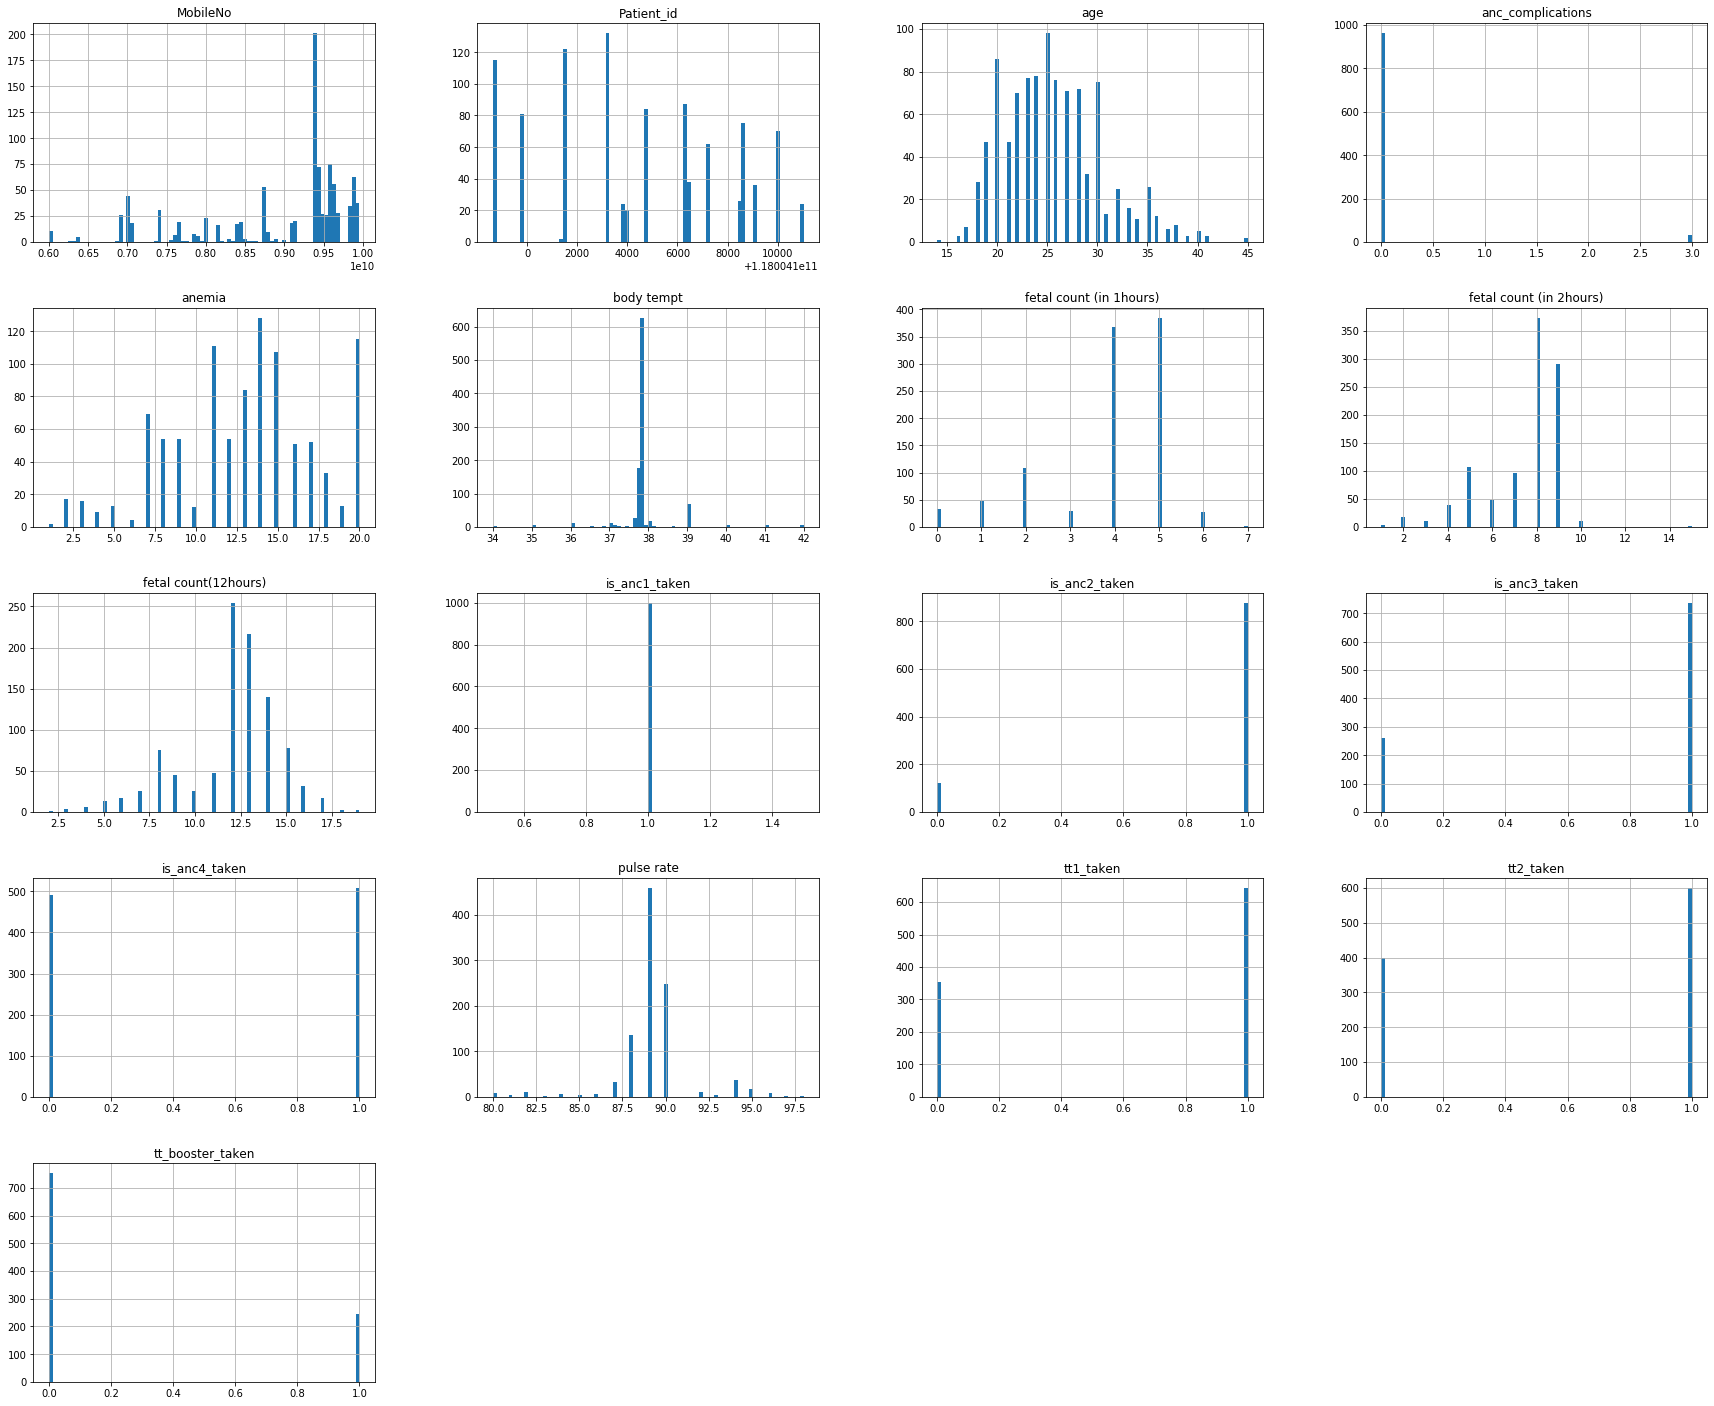

In [6]:
data_set.hist(bins=80,figsize=(30,25))
plt.show()

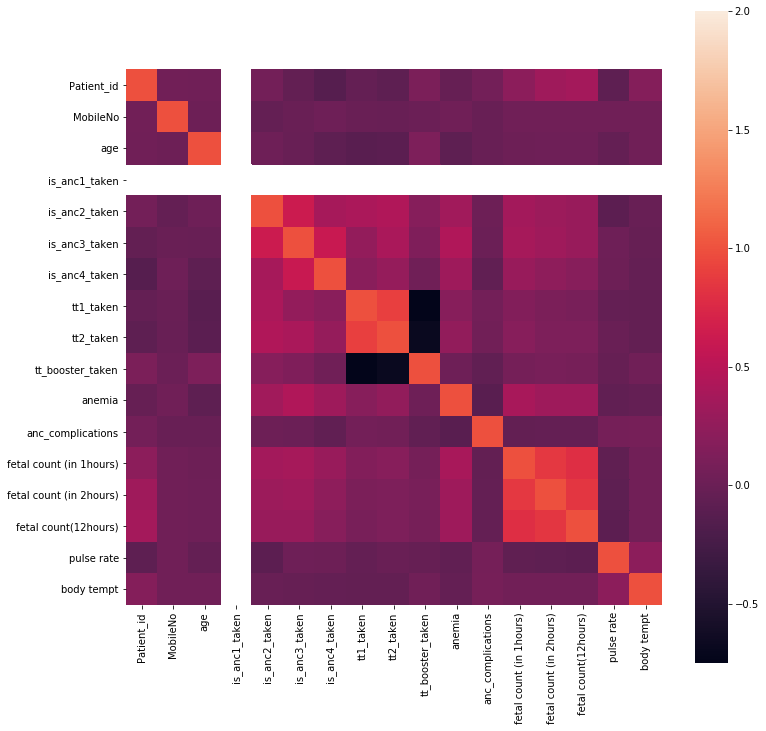

In [7]:
#correlation matrix to determine coorelation between one parameter to other parameter
corrmat=data_set.corr()
fig=plt.figure(figsize=(12,12))
sns.heatmap(corrmat,vmax=2,square=True)
plt.show()

In [8]:
data_set["class"].value_counts() #to count Low Risk,High Risk,Moderate Risk in dataset


Low Risk         562
High Risk        354
Moderate Risk     82
Name: class, dtype: int64

In [9]:
Y=(data_set["class"].value_counts()*100)/len(data_set)
df=pd.DataFrame([Y])
df.to_csv('%model_data.csv',index=False,header=['Low Risk','High Risk','Moderate Risk'] )
print("Data exported to CSV....!")


Data exported to CSV....!


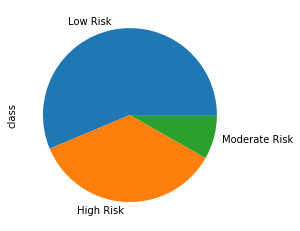

In [10]:
Y.plot.pie()           # to represent class in pie chart//

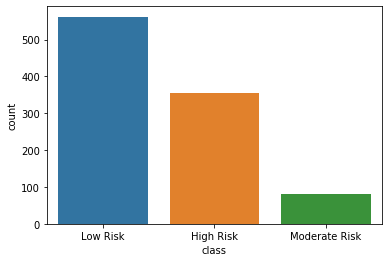

In [11]:
sns.countplot(x="class",data=data_set) 

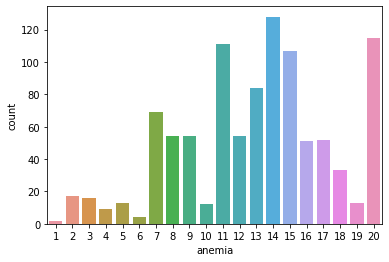

In [12]:

sns.countplot(x="anemia",data=data_set)

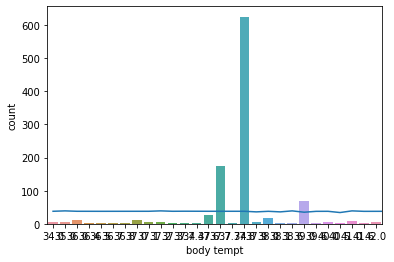

In [13]:
data_set["body tempt"].plot.line()
sns.countplot(x="body tempt",data=data_set)

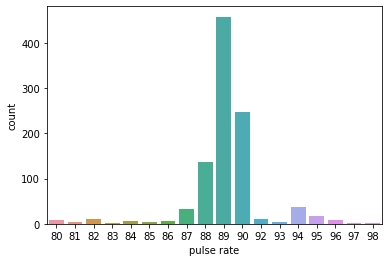

In [14]:

sns.countplot(x="pulse rate",data=data_set)


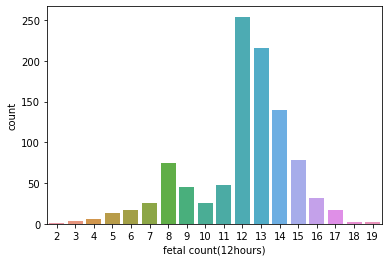

In [15]:
sns.countplot(x="fetal count(12hours)",data=data_set)

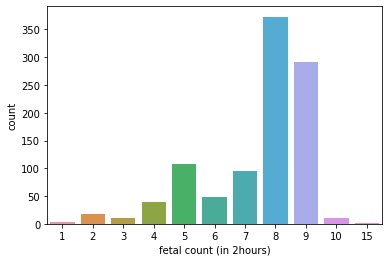

In [16]:
sns.countplot(x="fetal count (in 2hours)",data=data_set)

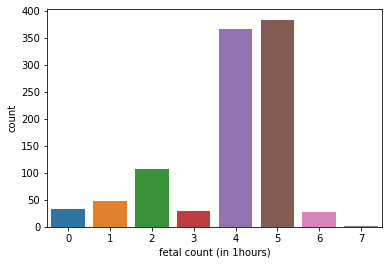

In [17]:
sns.countplot(x="fetal count (in 1hours)",data=data_set)

In [5]:
#classifies features and label
features=data_set.iloc[:, 3:18]
X = np.array(features)
target= data_set[['class']]
y = np.array(target['class']) 

In [6]:
# split  Data set into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=60)

In [7]:
#Random Forest Algorithm
rnd_clf=RandomForestClassifier(n_estimators=800,max_depth=8,random_state=0)
rnd_clf.fit(X_train,y_train)
y_pred_en=rnd_clf.predict(X_test)
print ("Random Forest Classifier Accuracy: %f" %accuracy_score(y_test,y_pred_en))

Random Forest Classifier Accuracy: 0.985000


In [21]:
logreg=LogisticRegression(solver='lbfgs', multi_class='auto')
logreg.fit(X_train,y_train)
y_pred = logreg.predict(X_test)
print("Logical Regression  Classifier Accuracy: %f " %accuracy_score(y_test, y_pred))

Logical Regression  Classifier Accuracy: 0.905000 


In [22]:
#confusion matrix
print("confusion_matrix:",confusion_matrix(y_test,y_pred_en))


confusion_matrix: [[ 63   0   0]
 [  1 120   0]
 [  0   2  14]]


In [23]:
#classification report
print("Classification Report:",classification_report(y_test,y_pred_en))


Classification Report:                precision    recall  f1-score   support

    High Risk       0.98      1.00      0.99        63
     Low Risk       0.98      0.99      0.99       121
Moderate Risk       1.00      0.88      0.93        16

     accuracy                           0.98       200
    macro avg       0.99      0.96      0.97       200
 weighted avg       0.99      0.98      0.98       200



In [24]:
rnd_clf.fit(X,y)
user_input_list = [] # create empty list

patent_age = float(input("Patent's Age ? "))
anc1_taken = int(input("Patent's ANC 1 Status ? "))
anc2_taken = int(input("Patent's ANC 2 Status ? "))
anc3_taken = int(input("Patent's ANC 3 Status ? "))
anc4_taken = int(input("Patent's ANC 4 Status ? "))
tt1_taken = int(input("Patent's TT 1 Status ? "))
tt2_taken = int(input("Patent's TT 2 Status ? "))
tt_booster= int(input("Patent's TT Booster  Status ? "))
hg_value= int(input("Patent's Hg value ? "))
complications =int(input("Complications value ? "))
Fetal_count_1hour=int(input("Fetal count in 1hour ? "))
Fetal_count_2hour=int(input("Fetal count in 2hour?"))
Fetal_count_12hour=int(input("Fetal count in 12 hour?"))
Pulse_rate=int(input("Patient pulse rate?"))
Body_temp=float(input("Body tempt?"))

user_input_list.append(patent_age)
user_input_list.append(anc1_taken)
user_input_list.append(anc2_taken)
user_input_list.append(anc3_taken)
user_input_list.append(anc4_taken)
user_input_list.append(tt1_taken)
user_input_list.append(tt2_taken)
user_input_list.append(tt_booster)
user_input_list.append(hg_value)
user_input_list.append(complications)
user_input_list.append(Fetal_count_1hour)
user_input_list.append(Fetal_count_2hour)
user_input_list.append(Fetal_count_12hour)
user_input_list.append(Pulse_rate)
user_input_list.append(Body_temp)


y_pred_rnd = rnd_clf.predict([user_input_list])
print("Patent Status for User Input is in : "+y_pred_rnd)


Patent's Age ? 22
Patent's ANC 1 Status ? 1
Patent's ANC 2 Status ? 0
Patent's ANC 3 Status ? 1
Patent's ANC 4 Status ? 0
Patent's TT 1 Status ? 1
Patent's TT 2 Status ? 0
Patent's TT Booster  Status ? 1
Patent's Hg value ? 12
Complications value ? 0
Fetal count in 1hour ? 4
Fetal count in 2hour?8
Fetal count in 12 hour?12
Patient pulse rate?89
Body tempt?37.8
['Patent Status for User Input is in : Low Risk']


In [25]:
test_data_set=pd.read_csv("test_Mmr_monitor1.csv")
print("length of test dataset:",len(test_data_set))
print("size of test dataset:",test_data_set.shape)
cols = test_data_set.columns.tolist()
cols.insert(3, cols.pop(1))
test_data_set = test_data_set[cols]

length of test dataset: 998
size of test dataset: (998, 18)


In [26]:
patient_list=[]
for i,patient in test_data_set.iterrows():
    y_pred_rnd = rnd_clf.predict([np.array(patient[3:18])])
    if(y_pred_rnd[0]=='High Risk'):
        for rows in range(len(test_data_set)):
            column = []
            for j in range(1):
                column.append(patient[0])
                column.append(patient[2])
                column.append(y_pred_rnd[0])
            patient_list.append(column)
            break
            print('Status of Mother ID \033[4m{0}\033[0m is in \033[1m\033[91m{1}\033[0m please inform by calling the mobile no \033[96m{2}\033[0m'.format(patient[0], y_pred_rnd[0], patient[2]))

In [27]:
#generate csv
df = pd.DataFrame(patient_list)

df.to_csv('Alert_Patients.csv',index=False,header=['Mother ID','Mobile_No','Risk Level'] )
print("Data exported to CSV....!")

Data exported to CSV....!


In [28]:
patient_list=[]
for i,patient in test_data_set.iterrows():
    y_pred_rnd = rnd_clf.predict([np.array(patient[3:18])])
    if(y_pred_rnd[0]=='Low Risk'):
        for rows in range(len(test_data_set)):
            column = []
            for j in range(1):
                column.append(patient[0])
                column.append(patient[2])
                column.append(y_pred_rnd[0])
            patient_list.append(column)
            break
        print('Status of Mother ID \033[4m{0}\033[0m is in \033[1m\033[91m{1}\033[0m please inform by calling the mobile no \033[96m{2}\033[0m'.format(patient[0], y_pred_rnd[0], patient[2]))

Status of Mother ID 118004098640 is in Low Risk please inform by calling the mobile no 9613579354
Status of Mother ID 118004098642 is in Low Risk please inform by calling the mobile no 9854438892
Status of Mother ID 118004098645 is in Low Risk please inform by calling the mobile no 9854438892
Status of Mother ID 118004098648 is in Low Risk please inform by calling the mobile no 9854438892
Status of Mother ID 118004098650 is in Low Risk please inform by calling the mobile no 7399135954
Status of Mother ID 118004098652 is in Low Risk please inform by calling the mobile no 7399135954
Status of Mother ID 118004098653 is in Low Risk please inform by calling the mobile no 9859106288
Status of Mother ID 118004098656 is in Low Risk please inform by calling the mobile no 9859106288
Status of Mother ID 118004098658 is in Low Risk please inform by calling the mobile no 9401040086
Status of Mother ID 118004098663 is in Low Risk please inform by calling the mobile no 8011288702
Status of Mother ID 

Status of Mother ID 118004099747 is in Low Risk please inform by calling the mobile no 9859942179
Status of Mother ID 118004099748 is in Low Risk please inform by calling the mobile no 9859942179
Status of Mother ID 118004099749 is in Low Risk please inform by calling the mobile no 6900813748
Status of Mother ID 118004099750 is in Low Risk please inform by calling the mobile no 9854130332
Status of Mother ID 118004099751 is in Low Risk please inform by calling the mobile no 8134082029
Status of Mother ID 118004099753 is in Low Risk please inform by calling the mobile no 9108619161
Status of Mother ID 118004099754 is in Low Risk please inform by calling the mobile no 8310299298
Status of Mother ID 118004099756 is in Low Risk please inform by calling the mobile no 7399681259
Status of Mother ID 118004099757 is in Low Risk please inform by calling the mobile no 7086917231
Status of Mother ID 118004099758 is in Low Risk please inform by calling the mobile no 8761938794
Status of Mother ID 

Status of Mother ID 118004101443 is in Low Risk please inform by calling the mobile no 9401288408
Status of Mother ID 118004101445 is in Low Risk please inform by calling the mobile no 9567699557
Status of Mother ID 118004101446 is in Low Risk please inform by calling the mobile no 9613579286
Status of Mother ID 118004101447 is in Low Risk please inform by calling the mobile no 9613579286
Status of Mother ID 118004101448 is in Low Risk please inform by calling the mobile no 9613579286
Status of Mother ID 118004101449 is in Low Risk please inform by calling the mobile no 9613579286
Status of Mother ID 118004101450 is in Low Risk please inform by calling the mobile no 9613579286
Status of Mother ID 118004101452 is in Low Risk please inform by calling the mobile no 9854939789
Status of Mother ID 118004101455 is in Low Risk please inform by calling the mobile no 9613795893
Status of Mother ID 118004101456 is in Low Risk please inform by calling the mobile no 9613795893
Status of Mother ID 

Status of Mother ID 118004101546 is in Low Risk please inform by calling the mobile no 9401139865
Status of Mother ID 118004101548 is in Low Risk please inform by calling the mobile no 9854939789
Status of Mother ID 118004101549 is in Low Risk please inform by calling the mobile no 9854939789
Status of Mother ID 118004101551 is in Low Risk please inform by calling the mobile no 9854939789
Status of Mother ID 118004103148 is in Low Risk please inform by calling the mobile no 9401000387
Status of Mother ID 118004103150 is in Low Risk please inform by calling the mobile no 9365887850
Status of Mother ID 118004103151 is in Low Risk please inform by calling the mobile no 9613578574
Status of Mother ID 118004103153 is in Low Risk please inform by calling the mobile no 7853012325
Status of Mother ID 118004103154 is in Low Risk please inform by calling the mobile no 8011774835
Status of Mother ID 118004103155 is in Low Risk please inform by calling the mobile no 8011332299
Status of Mother ID 

Status of Mother ID 118004103260 is in Low Risk please inform by calling the mobile no 9613578574
Status of Mother ID 118004103261 is in Low Risk please inform by calling the mobile no 9613578574
Status of Mother ID 118004103267 is in Low Risk please inform by calling the mobile no 9401684632
Status of Mother ID 118004103268 is in Low Risk please inform by calling the mobile no 9401684632
Status of Mother ID 118004103270 is in Low Risk please inform by calling the mobile no 6900677733
Status of Mother ID 118004103272 is in Low Risk please inform by calling the mobile no 9859763464
Status of Mother ID 118004103274 is in Low Risk please inform by calling the mobile no 9101861614
Status of Mother ID 118004103275 is in Low Risk please inform by calling the mobile no 9954506571
Status of Mother ID 118004103276 is in Low Risk please inform by calling the mobile no 7035574136
Status of Mother ID 118004103277 is in Low Risk please inform by calling the mobile no 7035574136
Status of Mother ID 

Status of Mother ID 118004104749 is in Low Risk please inform by calling the mobile no 9365766300
Status of Mother ID 118004104751 is in Low Risk please inform by calling the mobile no 9101991284
Status of Mother ID 118004104752 is in Low Risk please inform by calling the mobile no 9435985856
Status of Mother ID 118004104753 is in Low Risk please inform by calling the mobile no 9401152714
Status of Mother ID 118004104754 is in Low Risk please inform by calling the mobile no 9531038348
Status of Mother ID 118004104759 is in Low Risk please inform by calling the mobile no 6900813749
Status of Mother ID 118004104760 is in Low Risk please inform by calling the mobile no 6900813749
Status of Mother ID 118004104761 is in Low Risk please inform by calling the mobile no 6900813749
Status of Mother ID 118004104762 is in Low Risk please inform by calling the mobile no 8133831492
Status of Mother ID 118004104763 is in Low Risk please inform by calling the mobile no 9435865714
Status of Mother ID 

Status of Mother ID 118004106383 is in Low Risk please inform by calling the mobile no 7035839167
Status of Mother ID 118004106384 is in Low Risk please inform by calling the mobile no 7035839167
Status of Mother ID 118004106386 is in Low Risk please inform by calling the mobile no 9365863365
Status of Mother ID 118004106389 is in Low Risk please inform by calling the mobile no 9132262907
Status of Mother ID 118004106390 is in Low Risk please inform by calling the mobile no 9132262907
Status of Mother ID 118004106393 is in Low Risk please inform by calling the mobile no 9707880403
Status of Mother ID 118004106396 is in Low Risk please inform by calling the mobile no 9365313013
Status of Mother ID 118004106399 is in Low Risk please inform by calling the mobile no 7637057911
Status of Mother ID 118004106405 is in Low Risk please inform by calling the mobile no 9365863365
Status of Mother ID 118004106417 is in Low Risk please inform by calling the mobile no 9577878943
Status of Mother ID 

Status of Mother ID 118004108563 is in Low Risk please inform by calling the mobile no 9577504949
Status of Mother ID 118004108564 is in Low Risk please inform by calling the mobile no 9577189738
Status of Mother ID 118004108566 is in Low Risk please inform by calling the mobile no 9577189738
Status of Mother ID 118004108567 is in Low Risk please inform by calling the mobile no 8133870739
Status of Mother ID 118004108572 is in Low Risk please inform by calling the mobile no 8011284201
Status of Mother ID 118004108578 is in Low Risk please inform by calling the mobile no 8133870739
Status of Mother ID 118004108579 is in Low Risk please inform by calling the mobile no 8011556008
Status of Mother ID 118004108581 is in Low Risk please inform by calling the mobile no 9859641536
Status of Mother ID 118004108584 is in Low Risk please inform by calling the mobile no 9859641536
Status of Mother ID 118004108586 is in Low Risk please inform by calling the mobile no 8472025940
Status of Mother ID 

Status of Mother ID 118004110026 is in Low Risk please inform by calling the mobile no 9401985984
Status of Mother ID 118004110027 is in Low Risk please inform by calling the mobile no 9401205578
Status of Mother ID 118004110028 is in Low Risk please inform by calling the mobile no 9401675965
Status of Mother ID 118004110029 is in Low Risk please inform by calling the mobile no 9401428395
Status of Mother ID 118004110030 is in Low Risk please inform by calling the mobile no 9401764608
Status of Mother ID 118004110031 is in Low Risk please inform by calling the mobile no 9435699695
Status of Mother ID 118004110032 is in Low Risk please inform by calling the mobile no 9401421160
Status of Mother ID 118004110033 is in Low Risk please inform by calling the mobile no 9401205418
Status of Mother ID 118004110035 is in Low Risk please inform by calling the mobile no 9435469100
Status of Mother ID 118004110037 is in Low Risk please inform by calling the mobile no 9531046827
Status of Mother ID 

In [29]:
#generate csv
df = pd.DataFrame(patient_list)
df.to_csv('Low_Risk_Patients.csv',index=False,header=['Mother ID','Mobile_No','Risk Level'] )
print("Data exported to CSV....!")

Data exported to CSV....!


In [30]:
patient_list=[]
for i,patient in test_data_set.iterrows():
    y_pred_rnd = rnd_clf.predict([np.array(patient[3:18])])
    if(y_pred_rnd[0]=='Moderate Risk'):
        for rows in range(len(test_data_set)):
            column = []
            for j in range(1):
                column.append(patient[0])
                column.append(patient[2])
                column.append(y_pred_rnd[0])
            patient_list.append(column)
            break
        print('Status of Mother ID \033[4m{0}\033[0m is in \033[1m\033[91m{1}\033[0m please inform by calling the mobile no \033[96m{2}\033[0m'.format(patient[0], y_pred_rnd[0], patient[2]))

Status of Mother ID 118004098643 is in Moderate Risk please inform by calling the mobile no 9854438892
Status of Mother ID 118004098644 is in Moderate Risk please inform by calling the mobile no 9854438892
Status of Mother ID 118004098662 is in Moderate Risk please inform by calling the mobile no 8399872838
Status of Mother ID 118004098666 is in Moderate Risk please inform by calling the mobile no 8317375391
Status of Mother ID 118004098667 is in Moderate Risk please inform by calling the mobile no 9435881526
Status of Mother ID 118004098669 is in Moderate Risk please inform by calling the mobile no 7399135954
Status of Mother ID 118004098686 is in Moderate Risk please inform by calling the mobile no 7399135954
Status of Mother ID 118004098689 is in Moderate Risk please inform by calling the mobile no 8486177671
Status of Mother ID 118004098695 is in Moderate Risk please inform by calling the mobile no 9365281707
Status of Mother ID 118004098702 is in Moderate Risk please inform by cal

Status of Mother ID 118004108589 is in Moderate Risk please inform by calling the mobile no 9678288638
Status of Mother ID 118004108605 is in Moderate Risk please inform by calling the mobile no 8472025940
Status of Mother ID 118004108606 is in Moderate Risk please inform by calling the mobile no 8472025940
Status of Mother ID 118004108608 is in Moderate Risk please inform by calling the mobile no 6000068522
Status of Mother ID 118004108624 is in Moderate Risk please inform by calling the mobile no 9577189738
Status of Mother ID 118004108628 is in Moderate Risk please inform by calling the mobile no 8133870739
Status of Mother ID 118004109135 is in Moderate Risk please inform by calling the mobile no 9531176145
Status of Mother ID 118004109138 is in Moderate Risk please inform by calling the mobile no 9401438168
Status of Mother ID 118004109150 is in Moderate Risk please inform by calling the mobile no 9435689352
Status of Mother ID 118004109158 is in Moderate Risk please inform by cal

In [31]:
#generate csv
df = pd.DataFrame(patient_list)
df.to_csv('Moderate_Risk_patients.csv',index=False,header=['Mother ID','Mobile_No','Risk Level'] )
print("Data exported to CSV....!")

Data exported to CSV....!


In [32]:
Data_1=pd.read_csv("Low_Risk_Patients.csv")
Y=(Data_1["Risk Level"].value_counts()*100)/len(test_data_set)
Data_2=pd.read_csv("Moderate_Risk_patients.csv")
Z=(Data_2["Risk Level"].value_counts()*100)/len(test_data_set)
Data=pd.read_csv('Alert_Patients.csv')
X=(Data["Risk Level"].value_counts())*100/len(test_data_set)
print(X,Y,Z)

High Risk    35.370741
Name: Risk Level, dtype: float64 Low Risk    56.513026
Name: Risk Level, dtype: float64 Moderate Risk    8.116232
Name: Risk Level, dtype: float64


In [33]:
df1=pd.read_csv("Alert_Patients.csv")
df2=pd.read_csv("Moderate_Risk_patients.csv")
df3=pd.read_csv("Low_Risk_Patients.csv")
df4=pd.concat([df1,df2,df3],axis=0,join='inner')
df5=pd.DataFrame(df4)
df5.to_csv('Patients_ Record .csv',index=False,header=['Mother ID','Mobile_No','Risk Level'])
print("Data exported to CSV.....!")

Data exported to CSV.....!


In [34]:
df5["Risk Level"].value_counts()

Low Risk         564
High Risk        353
Moderate Risk     81
Name: Risk Level, dtype: int64

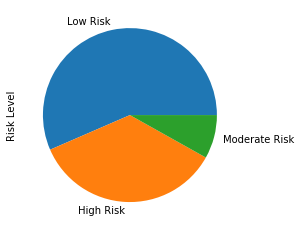

In [35]:
Y=(df5["Risk Level"].value_counts()*100)/len(test_data_set)


Y.plot.pie()

In [36]:
df = pd.DataFrame([Y]) 
df.to_csv('%test_data.csv',index=False,header=['Low Risk','High Risk','Moderate Risk'] )
print("Data exported to CSV....!")


Data exported to CSV....!
